# Task 2 - Predictive Analytics

1. Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

2. Using the same transaction dataset, identify the annual salary for each customer

3. Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

4. Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

5. How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

6. For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

### Step1 : Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step2 : Load dataset

Here we will use the ANZ cleaned dataset, which we have acquired from the task 1 which is exploratory data analysis. During EDA, I have clean the dataset, remove the missing values and unnecessary columns.

In [30]:
df = pd.read_csv('ANZ Cleaned data.csv', index_col = 0)

df.head(3)

,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,amount,country,customer_id,movement,month,time,Longitude,Latitude
0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,16.25,Australia,CUS-2487424745,debit,August,01:01:15,153.41,-27.95
1,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,14.19,Australia,CUS-2487424745,debit,August,01:13:45,153.41,-27.95
2,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,6.42,Australia,CUS-2142601169,debit,August,01:26:15,151.23,-33.94


### Step3 : Explore dataset

In [31]:
#Check rows and columns
rows, columns = df.shape
print(f'There are {rows} rows and {columns} columns')

There are 12043 rows and 17 columns


In [32]:
#Check info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   account          12043 non-null  object 
 1   currency         12043 non-null  object 
 2   long_lat         12043 non-null  object 
 3   txn_description  12043 non-null  object 
 4   first_name       12043 non-null  object 
 5   balance          12043 non-null  float64
 6   date             12043 non-null  object 
 7   gender           12043 non-null  object 
 8   age              12043 non-null  int64  
 9   amount           12043 non-null  float64
 10  country          12043 non-null  object 
 11  customer_id      12043 non-null  object 
 12  movement         12043 non-null  object 
 13  month            12043 non-null  object 
 14  time             12043 non-null  object 
 15  Longitude        12043 non-null  float64
 16  Latitude         12043 non-null  float64
dtypes: float64(4

- **Identify the Annual Salary of Customer**

For annual salary identification, we will add the balance and amount. Here I am assuming that the balance amount is annual amount and customer make transaction from that amount.

In [33]:
# Identify the annual salary
df['Annual_Salary'] = (df['balance'] + df['amount']) * 12

In [34]:
# Annual salary of 3 random customers
df['Annual_Salary'].sample(3)

5045     69450.84
3349    748382.64
393      62284.56
Name: Annual_Salary, dtype: float64

- **Explore correlations between annual salary and various customer attributes (e.g. age)**

In [35]:
df.corr()

,balance,age,amount,Longitude,Latitude,Annual_Salary
balance,1.000000,0.199329,0.059178,-0.022436,0.014786,0.999824
age,0.199329,1.000000,0.029980,0.031728,0.068866,0.199636
amount,0.059178,0.029980,1.000000,-0.000677,-0.015175,0.077888
Longitude,-0.022436,0.031728,-0.000677,1.000000,-0.682094,-0.022420
Latitude,0.014786,0.068866,-0.015175,-0.682094,1.000000,0.014482
Annual_Salary,0.999824,0.199636,0.077888,-0.022420,0.014482,1.000000


We will here drop the columns which have no impact and are showing negative correlation

In [36]:
# Further drop unnecessary columns
df.drop(['account', 'currency', 'long_lat', 'country', 'customer_id', 'Longitude', 'Latitude', 'first_name',
'date', 'movement', 'month', 'time', 'balance', 'amount', 'txn_description'],
axis = 1, inplace = True)

In [37]:
#view dataset
df.head()

,gender,age,Annual_Salary
0,F,26,619.68
1,F,26,424.68
2,M,38,145.56
3,F,40,25897.44
4,F,26,254.40


In [38]:
# Check correlation
df.corr()

,age,Annual_Salary
age,1.000000,0.199636
Annual_Salary,0.199636,1.000000


<AxesSubplot:>

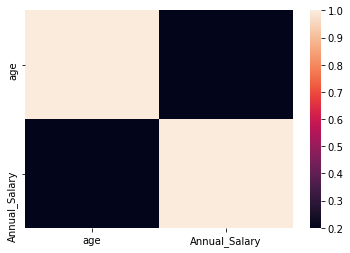

In [39]:
# Correlation heatmap
sns.heatmap(df.corr())

- **Correlation between age and annual salary**

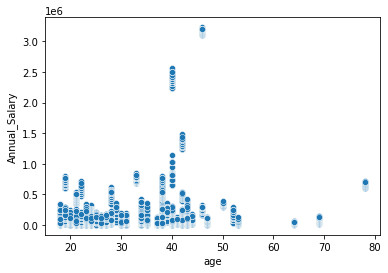

In [ ]:
sns.scatterplot(x = 'age', y = 'Annual_Salary', data = df)
plt.show()

- **Build a regression model to predict the annual salary**

In [79]:
# import sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [53]:
# make a copy of dataset
df1 = df.copy()

In [58]:
le = LabelEncoder()
df1['gender'] = le.fit_transform(df1['gender'])

In [59]:
df1.head()

,gender,age,Annual_Salary
0,0,26,619.68
1,0,26,424.68
2,1,38,145.56
3,0,40,25897.44
4,0,26,254.40


In [73]:
# Select feature variables target variables

X = df1.iloc[:, :-1]

y = df1.iloc[:, -1:].values

In [74]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
# Fit the training dataset
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict the salary
y_pred = model.predict(X_test)
y_pred[:5]



array([[ 70917.13815012],
       [100603.3605854 ],
       [ 56074.02693248],
       [261461.92978955],
       [172403.26248372]])

In [86]:
# Check score of model
lr.score(X_test, y_test) * 100

5.237461367672536

**with linear regression model, score is not good we can not use it for customer segmentation**

In [83]:
# Check rmse  of model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

356704.92631657724

- **Decision Tree Model**

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
# build decision tree model
dt = DecisionTreeRegressor()

# fit the training dataset
dt.fit(X_train, y_train)

# predict the model
y_pred = dt.predict(X_test)
y_pred[:5]

array([ 73348.56130435,  47213.97116279,  43289.23239669, 150703.8641651 ,
        82523.54853147])

In [99]:
# check the score of model
dt.score(X_test, y_test) *100

56.5880167167358

**By using decision tree model, our score is improved which is 56% as compared to linear regression model which is just 5% score. If we conclude decision tree performs better as compared to regression model**